<a href="https://colab.research.google.com/github/yuneidy1703-png/Analisis-datos-fac-equipo-Yun/blob/main/informe_integrado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis Demográfico**

**Responsabilidades:**

*   Explorar las columnas básicas de demografía
*   Crear visualizaciones simples de edad, género, rango
*   Documentar hallazgos principales


In [ ]:
#Demografia basica.py
#Librerias
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Conectar a drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Leer los datos
df = pd.read_excel('/content/drive/MyDrive/Python/JEFAB_2024.xlsx')

In [ ]:
# Explorar estructura básica
print("=== INFORMACIÓN GENERAL ===")
print(f"Total de registros: {len(df)}")
print(f"Total de columnas: {len(df.columns)}")

=== INFORMACIÓN GENERAL ===
Total de registros: 6423
Total de columnas: 231


# **Preguntas**
1. ¿Cuál es el rango de edad más común?
2. ¿Hay diferencias en la distribución por género?
3. ¿Cuál es el grado militar más frecuente?

# **1. ¿Cuál es el rango de edad más común?**

In [ ]:
#  1.¿Cuál es el rango de edad más común?
# Retomamos el analisis de edad
print("\n=== RANGO DE EDAD MÁS COMÚN ===")
print("Promedio:", df['EDAD2'].mean().round(1))
print("Mínima:", df['EDAD2'].min())
print("Máxima:", df['EDAD2'].max())


=== RANGO DE EDAD MÁS COMÚN ===
Promedio: 36.7
Mínima: 18.0
Máxima: 69.0


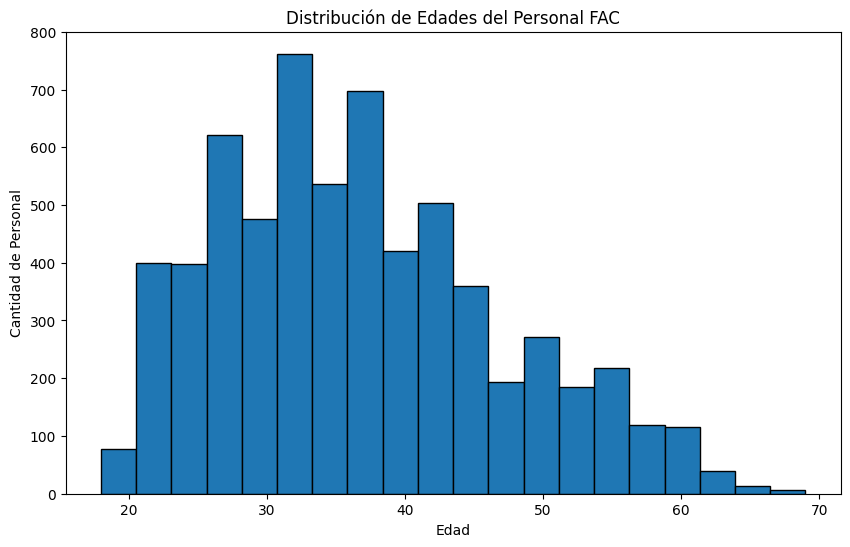

In [ ]:
# Gráfico de edades
plt.figure(figsize=(10, 6))
plt.hist(df['EDAD2'], bins=20, edgecolor='black')
plt.title('Distribución de Edades del Personal FAC')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Personal')
plt.show()

In [ ]:
# Con la columna EDAD_RANGO ya categorizada
print("Rango más común:", df['EDAD_RANGO'].mode()[0])
print(df['EDAD_RANGO'].value_counts())

Rango más común: 33-37
EDAD_RANGO
33-37    1254
28-32    1211
38-42    1012
23-27     958
43-47     601
48-52     470
53-57     371
18-22     309
58-62     194
63-67      26
68-72       4
Name: count, dtype: int64


In [ ]:
print("\n=== PROPORCION POR RANGO DE EDAD ===")
print(df['EDAD_RANGO'].value_counts(normalize=True) * 100)


=== PROPORCION POR RANGO DE EDAD ===
EDAD_RANGO
33-37    19.563183
28-32    18.892356
38-42    15.787832
23-27    14.945398
43-47     9.375975
48-52     7.332293
53-57     5.787832
18-22     4.820593
58-62     3.026521
63-67     0.405616
68-72     0.062402
Name: proportion, dtype: float64


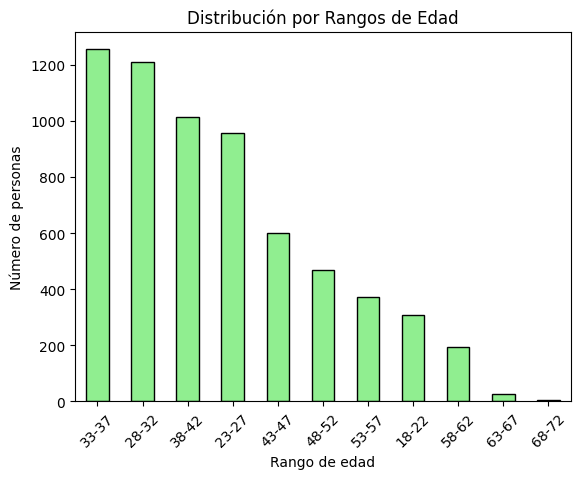

In [ ]:
# Gráfico
df['EDAD_RANGO'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title("Distribución por Rangos de Edad")
plt.xlabel("Rango de edad")
plt.ylabel("Número de personas")
plt.xticks(rotation=45)
plt.show()

De esta manera podemos indicar que el rango de edad mas comun en nuestra base de datos es de 33-37 años con una edad promedio de 36.7 años

# **2. ¿Hay diferencias en la distribución por género?**

In [ ]:
# 2. ¿Hay diferencias en la distribución por género?
print("\n=== DISTRIBUCIÓN POR GÉNERO ===")
print(df['GENERO'].value_counts(normalize=True) * 100)


=== DISTRIBUCIÓN POR GÉNERO ===
GENERO
MASCULINO     69.297836
FEMENINO      30.437490
OTRO           0.233536
NO BINARIO     0.031138
Name: proportion, dtype: float64


In [ ]:
# Análisis de género
print("\n=== ANÁLISIS DE GÉNERO ===")
print(df['GENERO'].value_counts())


=== ANÁLISIS DE GÉNERO ===
GENERO
MASCULINO     4451
FEMENINO      1955
OTRO            15
NO BINARIO       2
Name: count, dtype: int64


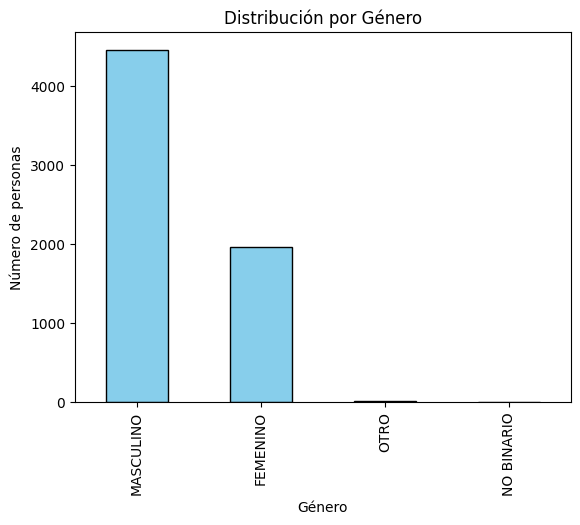

In [ ]:
# Gráfico
df['GENERO'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribución por Género")
plt.xlabel("Género")
plt.ylabel("Número de personas")
plt.show()

En cuanto a la variable género, se observa un claro predominio del genero masculino dentro de la muestra, seguido por el femenino en menor proporción. Las categorías “Otro” y “No binario” tienen una baja participación.

# **3. ¿Cuál es el grado militar más frecuente?**

In [ ]:
# 3. ¿Cuál es el grado militar más frecuente?
print("\n=== GRADO MILITAR MÁS FRECUENTE ===")
print("Grado más frecuente:", df['GRADO'].mode()[0])
print(df['GRADO'].value_counts().head())


=== GRADO MILITAR MÁS FRECUENTE ===
Grado más frecuente: NO RESPONDE
GRADO
NO RESPONDE    1929
T3              622
T2              621
T1              491
CT              483
Name: count, dtype: int64


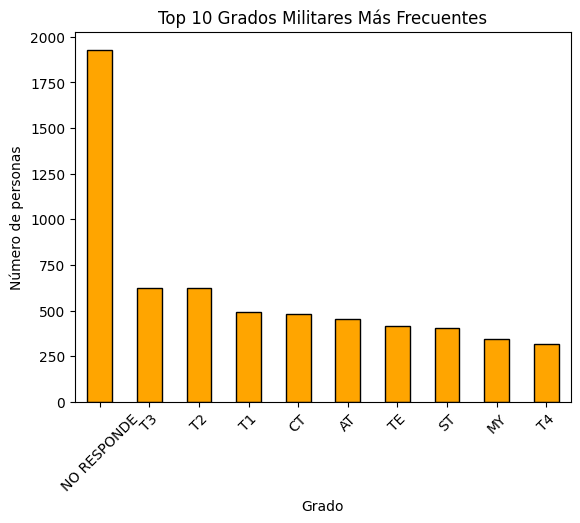

In [ ]:
# Gráfico
df['GRADO'].value_counts().head(10).plot(kind='bar', color='orange', edgecolor='black')
plt.title("Top 10 Grados Militares Más Frecuentes")
plt.xlabel("Grado")
plt.ylabel("Número de personas")
plt.xticks(rotation=45)
plt.show()

La categoría más frecuente fue “No responde”, lo que evidencia un vacío de información en los registros. Entre quienes reportaron su rango, predominan los grados técnicos (T3 y T2), lo cual refleja que gran parte del personal encuestado corresponde a suboficiales técnicos en diferentes niveles. Los grados de oficiales aparecen en menor proporción.

In [ ]:
# Revisar relación entre CATEGORIA y GRADO
pd.crosstab(df['CATEGORIA'], df['GRADO']).head(10)

GRADO,AT,BG,CR,CT,GR,MG,MY,NO RESPONDE,ST,T1,T2,T3,T4,TC,TE,TJ,TJC,TS
CATEGORIA,,,,,,,,,,,,,,,,,,
CIVIL,0,0,0,0,0,0,0,1929,0,0,0,0,0,0,0,0,0,0
OFICIAL,0,5,47,483,1,1,343,0,406,1,0,1,0,140,416,0,0,0
SUBOFICIAL,453,0,1,0,0,1,0,0,0,490,621,621,319,0,0,61,11,72


In [ ]:
# Revisar porcentaje de "No responde" por CATEGORIA
no_responde = df[df['GRADO'] == "NO RESPONDE"]
print(no_responde['CATEGORIA'].value_counts(normalize=True) * 100)

CATEGORIA
CIVIL    100.0
Name: proportion, dtype: float64


En el análisis del grado militar se observa que la categoría “No responde” corresponde en su totalidad a personal clasificado como “CIVIL”. Por lo tanto, esta ausencia no debe interpretarse como un dato faltante, sino como un valor no aplicable para este grupo, ya que los civiles no tienen rango militar

# Clonar el repo en github

In [ ]:
!git clone https://github.com/yuneidy1703-png/Analisis-datos-fac-equipo-Yun.git

Cloning into 'Analisis-datos-fac-equipo-Yun'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 14 (delta 1), reused 8 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (14/14), 5.25 MiB | 28.60 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
%cd Analisis-datos-fac-equipo-Yun

/content/Analisis-datos-fac-equipo-Yun


In [ ]:
!mv /content/drive/MyDrive/Colab\ Notebooks/Analisis_demografico.ipynb Reportes/

In [ ]:
!git config --global user.email "yuneidy1703@gmail.com"
!git config --global user.name "Yuneidy"

In [ ]:
!git config user.mail "yuneidyuniverisidad@gmail.com"
!git config user.name "Yun"

In [ ]:
!git add Reportes/Analisis_demografico.ipynb

In [ ]:
!git commit -m "Agrega notebook analisis_demografico a Reportes desde Colab"

[main 0651f61] Agrega notebook analisis_demografico a Reportes desde Colab
 1 file changed, 1 insertion(+)
 create mode 100644 Reportes/Analisis_demografico.ipynb


In [ ]:
!git push

fatal: could not read Username for 'https://github.com': No such device or address


# **Calidad de Datos**

**Responsabilidades:**
* Identificar datos faltantes y errores
* Proponer estrategias de limpieza
* Documentar problemas de calidad

In [ ]:
# calidad_datos.py
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Conectar a drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Leer los datos
df = pd.read_excel('/content/drive/MyDrive/Python/JEFAB_2024.xlsx')

In [ ]:
# Explorar estructura básica
print("=== INFORMACIÓN GENERAL ===")
print(f"Total de registros: {len(df)}")
print(f"Total de columnas: {len(df.columns)}")

=== INFORMACIÓN GENERAL ===
Total de registros: 6423
Total de columnas: 231


# **Preguntas a responder:**

1. ¿Qué columnas tienen más datos faltantes?
2. ¿Hay registros duplicados?
3. ¿Qué problemas de encoding se detectan?

# **1. ¿Qué columnas tienen más datos faltantes?**

In [ ]:
print("=== ANÁLISIS DE DATOS FALTANTES ===")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
print("Top 10 columnas con más datos faltantes:")
missing_info = pd.DataFrame({
'Columna': missing_data.index,
'Datos_Faltantes': missing_data.values,
'Porcentaje': missing_percent.values
}).sort_values('Datos_Faltantes', ascending=False)
print(missing_info.head(10))


=== ANÁLISIS DE DATOS FALTANTES ===
Top 10 columnas con más datos faltantes:
                                   Columna  Datos_Faltantes  Porcentaje
213  NUMERO_PERSONAS_APORTE_SOSTENIMIENTO2             3928   61.155223
212               NUMERO_HABITAN_VIVIENDA2             3808   59.286938
31                            NUMERO_HIJOS             3217   50.085630
32                          HIJOS_EN_HOGAR             3200   49.820956
216                       EDAD_RANGO_PADRE             1939   30.188385
17                              EDAD_PADRE             1939   30.188385
215                       EDAD_RANGO_MADRE              889   13.840884
13                              EDAD_MADRE              885   13.778608
7                                    EDAD2               13    0.202398
214                             EDAD_RANGO               13    0.202398


Esto indica que el mayor problema de completitud se concentra en variables de composición familiar y condiciones del hogar, lo cual puede afectar la representatividad en análisis sociodemográficos si no se realiza imputación o un manejo adecuado de los nulos.

Recomedaciones : Las variables con más de un 50% de faltantes requieren un análisis crítico; en algunos casos será mejor excluirlas segun su utilidad. En cambio, las variables de edad y número de hijos podrían beneficiarse de imputaciones condicionales o recodificación en categorías especiales, dependiendo del contexto de análisis.

# **2. ¿Hay registros duplicados?**



In [ ]:
# Análisis de duplicados
print(f"\n=== ANÁLISIS DE DUPLICADOS ===")
if n_duplicados > 0:
    print("Se recomienda eliminarlos para evitar distorsiones.")
else:
    print("No se encontraron registros duplicados.")
print(f"Registros duplicados: {df.duplicated().sum()}")


=== ANÁLISIS DE DUPLICADOS ===
No se encontraron registros duplicados.
Registros duplicados: 0


Esto significa que no existen filas repetidas que nos puedan generar sesgos o inflar frecuencias en posteriores análisis estadísticos

# **3. ¿Qué problemas de encoding se detectan?**

In [ ]:
# Análisis de tipos de datos
print(f"\n=== TIPOS DE DATOS ===")
print(df.dtypes.value_counts())
# Identificar columnas problemáticas
print(f"\n=== COLUMNAS CON CARACTERES ESPECIALES ===")
problematic_columns = [col for col in df.columns if 'Ã' in col or 'â' in col]
print(f"Columnas con encoding problemático: {len(problematic_columns)}")
for col in problematic_columns[:5]:
    print(f" - {col}")


=== TIPOS DE DATOS ===
int64      153
object      66
float64     12
Name: count, dtype: int64

=== COLUMNAS CON CARACTERES ESPECIALES ===
Columnas con encoding problemático: 0


La base está conformada principalmente por:

* 153 columnas de tipo entero (int64)
* 66 columnas categóricas (object)
* 12 columnas numéricas decimales (float64)

Predominan las variables enteras y categóricas esto refleja que gran parte de la información corresponde a conteos y clasificaciones (edad, hijos, rangos, etc.), lo cual es consistente con bases de encuestas sociodemográficos.

# **Análisis Familiar**

**Responsabilidades:**

*   Explorar variables relacionadas con familia
*   Analizar estado civil, hijos, convivencia
*   Identificar patrones familiares

In [ ]:
# analisis_familiar.py
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Conectar a drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Leer los datos
df = pd.read_excel('/content/drive/MyDrive/Python/JEFAB_2024.xlsx')

In [ ]:
# Explorar estructura básica
print("=== INFORMACIÓN GENERAL ===")
print(f"Total de registros: {len(df)}")
print(f"Total de columnas: {len(df.columns)}")

=== INFORMACIÓN GENERAL ===
Total de registros: 6423
Total de columnas: 231


# **Preguntas**
1. ¿Qué porcentaje del personal está casado?
2. ¿Cuántos tienen hijos y cuántos viven con ellos?
3. ¿Hay relación entre edad y estado civil?

# **1. ¿Qué porcentaje del personal está casado?**

In [ ]:
# Análisis de estado civil
print("=== ANÁLISIS ESTADO CIVIL ===")
print(df['ESTADO_CIVIL'].value_counts())

=== ANÁLISIS ESTADO CIVIL ===
ESTADO_CIVIL
CASADO        3889
SOLTERO/A     2084
DIVORCIADO     250
SEPARADO       161
VIUDO/A         39
Name: count, dtype: int64


In [ ]:
# Porcentaje de personas segun su estado civil
print("\n=== PROPORCION POR ESTADO CIVIL===")
print(df['ESTADO_CIVIL'].value_counts(normalize=True) * 100)


=== PROPORCION POR ESTADO CIVIL===
ESTADO_CIVIL
CASADO        60.548031
SOLTERO/A     32.445898
DIVORCIADO     3.892262
SEPARADO       2.506617
VIUDO/A        0.607193
Name: proportion, dtype: float64


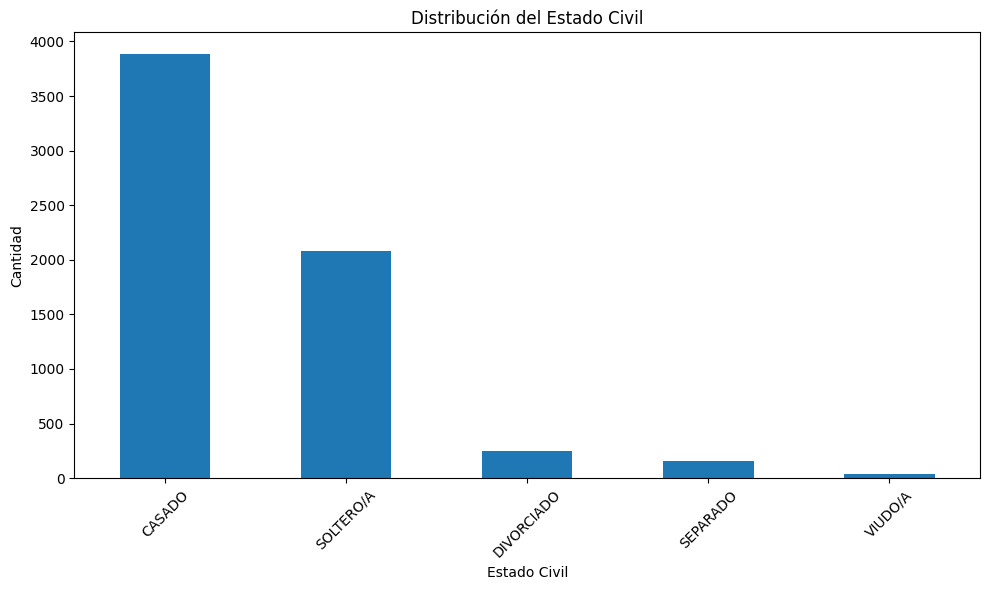

In [ ]:
# Gráfico de estado civil
plt.figure(figsize=(10, 6))
df['ESTADO_CIVIL'].value_counts().plot(kind='bar')
plt.title('Distribución del Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En este caso el estado civil muestra que la mayor proporción del personal se encuentra casado, con un 60,5% del total. En segundo lugar, se encuentran las personas solteras con un 32,4%. Los demás estados civiles presentan una participación significativamente menor: divorciados (3,9%), separados (2,5%) y viudos/as (0,6%). Estos resultados indican que la mayoría de la población encuestada se compone de individuos casados.

# **2. ¿Cuántos tienen hijos y cuántos viven con ellos?**

In [ ]:
# Cantidad de personas con o sin hijos
print("\n=== ANÁLISIS DE HIJOS ===")
print(f"Personal con hijos: {df['HIJOS'].value_counts()}")


=== ANÁLISIS DE HIJOS ===
Personal con hijos: HIJOS
SI    3669
NO    2754
Name: count, dtype: int64


In [ ]:
# Porcentaje de personas con o sin hijos
print("\n=== PROPORCION DE PERSONAS CON HIJOS ===")
print(df['HIJOS'].value_counts(normalize=True) * 100)


=== PROPORCION DE PERSONAS CON HIJOS ===
HIJOS
SI    57.12284
NO    42.87716
Name: proportion, dtype: float64


In [ ]:
# Cruce de hijos y convivencia
print("\n=== Hijos vs Convivencia Familiar ===")
print(pd.crosstab(df['HIJOS'], df['HABITA_VIVIENDA_FAMILIAR']))


=== Hijos vs Convivencia Familiar ===
HABITA_VIVIENDA_FAMILIAR    NO   SI
HIJOS                              
NO                        2118  636
SI                        3120  549


Para la variables hijos y convivencia familiar, observamos que el 57,1% del personal tiene hijos. Sin embargo, de este grupo, únicamente el 14,9% convive en la misma vivienda familiar.
 Estos hallazgos sugieren que, aunque la mayoría de los trabajadores son padres, no todos comparten residencia con sus hijos, lo cual puede estar asociado a factores como la independencia residencial, arreglos de custodia o dinámicas familiares particulares.

# **3. ¿Hay relación entre edad y estado civil?**

In [ ]:
# Promedio de edad por estado civil
print("\n=== Edad promedio por Estado Civil ===")
print(df.groupby('ESTADO_CIVIL')['EDAD2'].mean())


=== Edad promedio por Estado Civil ===
ESTADO_CIVIL
CASADO        39.687194
DIVORCIADO    40.352000
SEPARADO      40.875776
SOLTERO/A     30.217412
VIUDO/A       47.564103
Name: EDAD2, dtype: float64


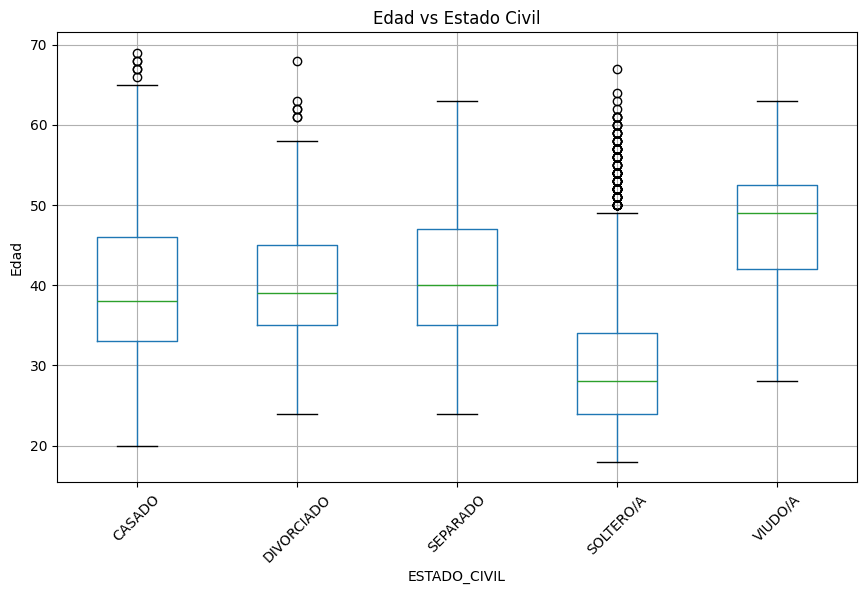

In [ ]:
# Distribución por edad y estado civil
df.boxplot(column='EDAD2', by='ESTADO_CIVIL', figsize=(10,6))
plt.title("Edad vs Estado Civil")
plt.suptitle("")
plt.ylabel("Edad")
plt.xticks(rotation=45)
plt.show()

El análisis de la relación entre edad y estado civil evidencia patrones claros. Las personas solteras presentan la edad promedio más baja (30,2 años), mientras que los casados, divorciados y separados registran promedios similares (entre 39 y 41 años). Finalmente, los viudos/as se ubican como el grupo de mayor edad promedio, con 47,5 años.
La visualización mediante el diagrama de caja confirma que los solteros concentran edades jóvenes, mientras que la viudez aparece asociada a edades mayores. Por lo que podriamos indicar que sí existe una relación entre la edad y el estado civil, donde las etapas del ciclo vital influyen en la condición marital predominante